### **Import Library**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Embedding
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import *
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

## **Import Dataset**

In [ ]:
df = pd.read_csv('sumatera.csv')
df

tanggal  kode_provinsi        provinsi  beras_medium  bawang_merah  \
0      01/04/2021              1            Aceh       10910.0       34400.0   
1      02/04/2021              1            Aceh       10750.0       33690.0   
2      03/04/2021              1            Aceh       10780.0       34010.0   
3      04/04/2021              1            Aceh       10830.0       33750.0   
4      05/04/2021              1            Aceh       10900.0       34330.0   
...           ...            ...             ...           ...           ...   
11565  27/05/2024             10  Kepulauan Riau       14120.0       39290.0   
11566  28/05/2024             10  Kepulauan Riau       14100.0       40020.0   
11567  29/05/2024             10  Kepulauan Riau       14140.0       40020.0   
11568  30/05/2024             10  Kepulauan Riau       14140.0       39960.0   
11569  31/05/2024             10  Kepulauan Riau       14140.0       39890.0   

       bawang_putih_bonggol  cabai_merah_keriting  telur_ayam_ras  \
0                   29270.0               46380.0         20820.0   
1                   26960.0               46250.0         21240.0   
2                   27500.0               47140.0         20720.0   
3                   28920.0               46140.0         21310.0   
4                   28250.0               46730.0         20800.0   
...                     ...                   ...             ...   
11565               37140.0               54930.0         32330.0   
11566               38120.0               71370.0         31870.0   
11567               37900.0               70920.0         32060.0   
11568               37760.0               71240.0         31870.0   
11569               37790.0               71910.0         31740.0   

       gula_konsumsi  minyak_goreng_kemasan_sederhana  
0            13620.0                          14250.0  
1            13580.0                          14140.0  
2            13580.0                          14030.0  
3            13650.0                          14270.0  
4            13510.0                          14250.0  
...              ...                              ...  
11565        16850.0                          16900.0  
11566        17070.0                          17130.0  
11567        17070.0                          17130.0  
11568        17070.0                          17130.0  
11569        17070.0                          17250.0  

[11570 rows x 10 columns]

## **Preprocessing**

In [ ]:
df['tanggal'] = pd.to_datetime(df['tanggal'], format='%d/%m/%Y')

In [ ]:
# drop kolom provinsi
df = df.drop(['provinsi'], axis=1)
df

tanggal  kode_provinsi  beras_medium  bawang_merah  \
0     2021-04-01              1       10910.0       34400.0   
1     2021-04-02              1       10750.0       33690.0   
2     2021-04-03              1       10780.0       34010.0   
3     2021-04-04              1       10830.0       33750.0   
4     2021-04-05              1       10900.0       34330.0   
...          ...            ...           ...           ...   
11565 2024-05-27             10       14120.0       39290.0   
11566 2024-05-28             10       14100.0       40020.0   
11567 2024-05-29             10       14140.0       40020.0   
11568 2024-05-30             10       14140.0       39960.0   
11569 2024-05-31             10       14140.0       39890.0   

       bawang_putih_bonggol  cabai_merah_keriting  telur_ayam_ras  \
0                   29270.0               46380.0         20820.0   
1                   26960.0               46250.0         21240.0   
2                   27500.0               47140.0         20720.0   
3                   28920.0               46140.0         21310.0   
4                   28250.0               46730.0         20800.0   
...                     ...                   ...             ...   
11565               37140.0               54930.0         32330.0   
11566               38120.0               71370.0         31870.0   
11567               37900.0               70920.0         32060.0   
11568               37760.0               71240.0         31870.0   
11569               37790.0               71910.0         31740.0   

       gula_konsumsi  minyak_goreng_kemasan_sederhana  
0            13620.0                          14250.0  
1            13580.0                          14140.0  
2            13580.0                          14030.0  
3            13650.0                          14270.0  
4            13510.0                          14250.0  
...              ...                              ...  
11565        16850.0                          16900.0  
11566        17070.0                          17130.0  
11567        17070.0                          17130.0  
11568        17070.0                          17130.0  
11569        17070.0                          17250.0  

[11570 rows x 9 columns]

In [ ]:
# buat fitur dan target
features = ['kode_provinsi']
targets = ['beras_medium', 'bawang_merah', 'bawang_putih_bonggol', 'cabai_merah_keriting', 'telur_ayam_ras', 'gula_konsumsi', 'minyak_goreng_kemasan_sederhana']

In [ ]:
# menetapkan random seed
tf.random.set_seed(123)

## **Normalisasi**

In [ ]:
# normalisasi nilai di dalam target
scaler = MinMaxScaler()
df[targets] = scaler.fit_transform(df[targets])
df[targets]

beras_medium  bawang_merah  bawang_putih_bonggol  cabai_merah_keriting  \
0          0.275915      0.314068              0.331990              0.263505   
1          0.251524      0.302034              0.247343              0.262331   
2          0.256098      0.307458              0.267131              0.270370   
3          0.263720      0.303051              0.319165              0.261337   
4          0.274390      0.312881              0.294613              0.266667   
...             ...           ...                   ...                   ...   
11565      0.765244      0.396949              0.620374              0.340741   
11566      0.762195      0.409322              0.656284              0.489250   
11567      0.768293      0.409322              0.648223              0.485185   
11568      0.768293      0.408305              0.643093              0.488076   
11569      0.768293      0.407119              0.644192              0.494128   

       telur_ayam_ras  gula_konsumsi  minyak_goreng_kemasan_sederhana  
0            0.088496       0.271540                         0.130917  
1            0.117086       0.266319                         0.122781  
2            0.081688       0.266319                         0.114645  
3            0.121852       0.275457                         0.132396  
4            0.087134       0.257180                         0.130917  
...               ...            ...                              ...  
11565        0.872022       0.693211                         0.326923  
11566        0.840708       0.721932                         0.343935  
11567        0.853642       0.721932                         0.343935  
11568        0.840708       0.721932                         0.343935  
11569        0.831858       0.721932                         0.352811  

[11570 rows x 7 columns]

## **Split Dataset**

In [ ]:
# split dataset menjadi data train dan data test
n_samples = len(df[targets])
train_size = int(n_samples * 0.8)
test_size = len(df[targets]) - train_size
train_data = df[features + targets][:train_size]
test_data = df[features + targets][train_size:]

## **Time Series Windowing**

In [ ]:
# buat data input dan output
time_steps = 7

def prepare_data(df, time_steps):
    X, y = [], []
    for i in range(len(df[targets]) - time_steps - 1):
        X.append(df[features + targets].iloc[i:i+time_steps].values)
        y.append(df[targets].iloc[i+time_steps].values)
    return np.array(X), np.array(y)

X_train, y_train = prepare_data(train_data, time_steps)
X_test, y_test = prepare_data(test_data, time_steps)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9248, 7, 8), (2306, 7, 8), (9248, 7), (2306, 7))

## **Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError

num_provinsi = len(df['kode_provinsi'].unique())
num_bahan_pangan = len(targets)
input_dim = X_train.shape[-1]
num_epoch = 100
num_batch = 16
Adam = Adam(learning_rate=0.001)

model = Sequential()
model.add(LSTM(32, activation='tanh', recurrent_activation='sigmoid', return_sequences=True, input_shape=(X_train.shape[1], input_dim)))
# model.add(LSTM(64, activation='tanh', recurrent_activation='sigmoid', return_sequences=False))
model.add(LSTM(64, activation='tanh', recurrent_activation='sigmoid', return_sequences=True))
# model.add(LSTM(128, activation='tanh', recurrent_activation='sigmoid', return_sequences=False))
model.add(LSTM(128, activation='tanh', recurrent_activation='sigmoid', return_sequences=True))
model.add(LSTM(256, activation='tanh', recurrent_activation='sigmoid', return_sequences=False))
model.add(Dense(num_bahan_pangan, bias_initializer='zeros'))
model.summary()

model.compile(optimizer=Adam, loss=MeanSquaredError(), metrics=[RootMeanSquaredError()])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=num_epoch, batch_size=num_batch, verbose=1, callbacks=[early_stop])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 32)             5248      
                                                                 
 lstm_1 (LSTM)               (None, 7, 64)             24832     
                                                                 
 lstm_2 (LSTM)               (None, 7, 128)            98816     
                                                                 
 lstm_3 (LSTM)               (None, 256)               394240    
                                                                 
 dense (Dense)               (None, 7)                 1799      
                                                                 
Total params: 524935 (2.00 MB)
Trainable params: 524935 (2.00 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
578/578 

## **Visualisasi**

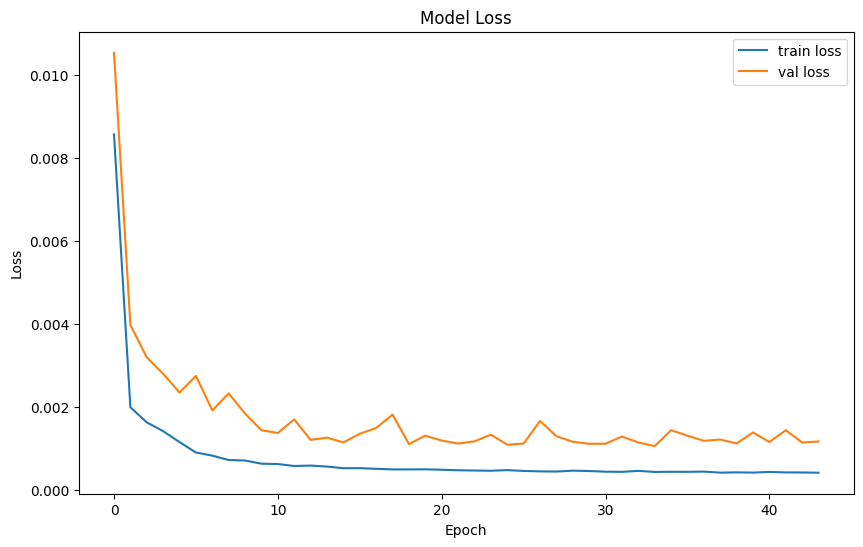

In [ ]:
# plot loss untuk model

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(history.history['loss'], label = 'train loss')
ax.plot(history.history['val_loss'], label = 'val loss')
ax.set_title('Model Loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.legend()
plt.show()

73/73 [==============================] - 1s 3ms/step


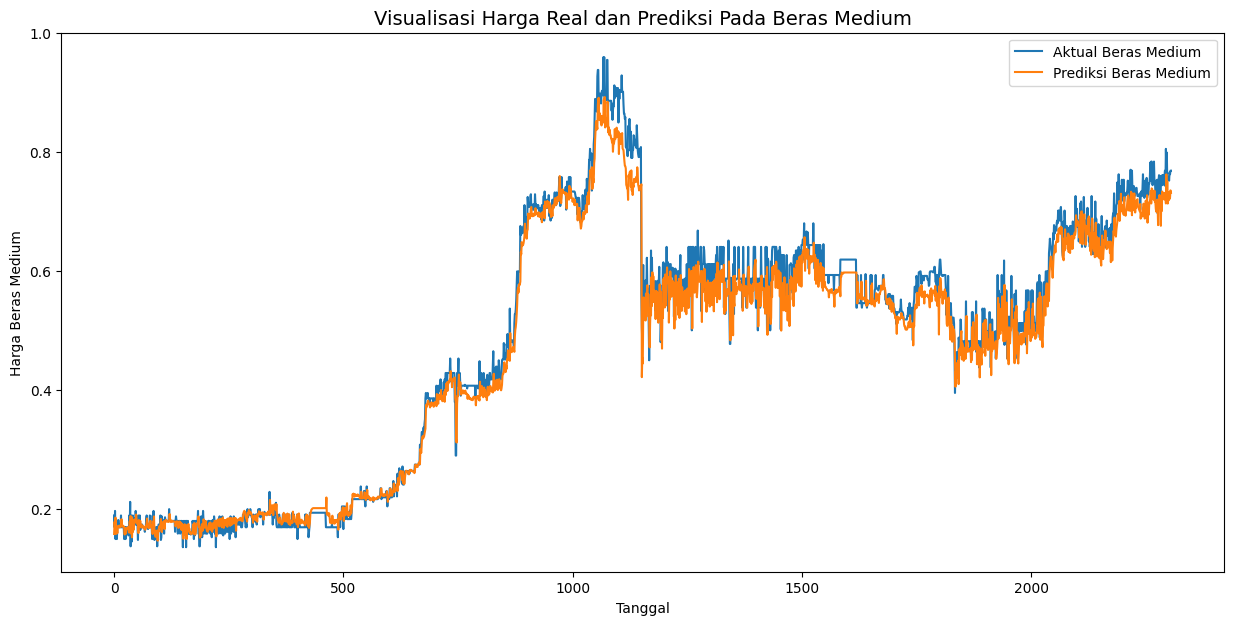

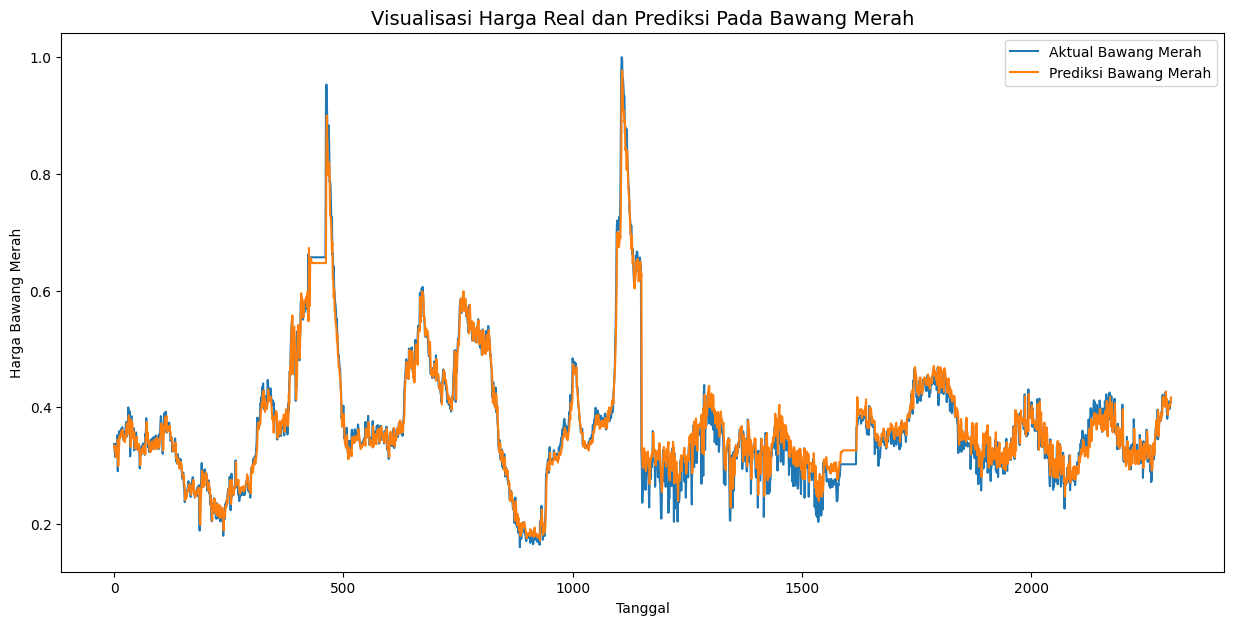

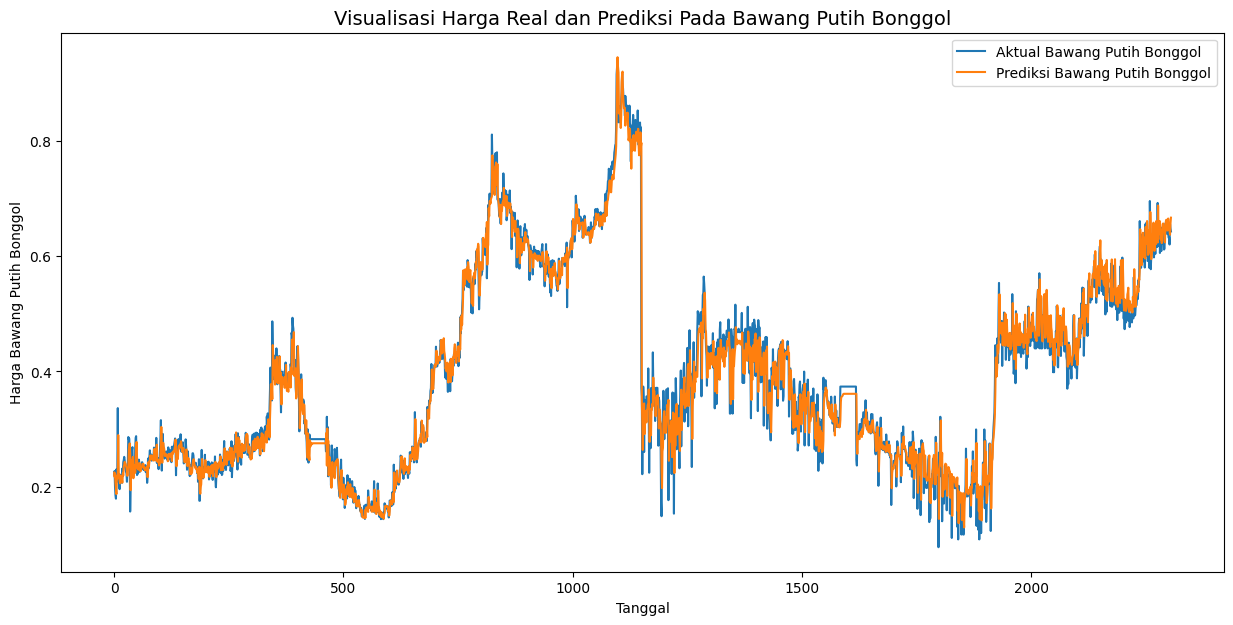

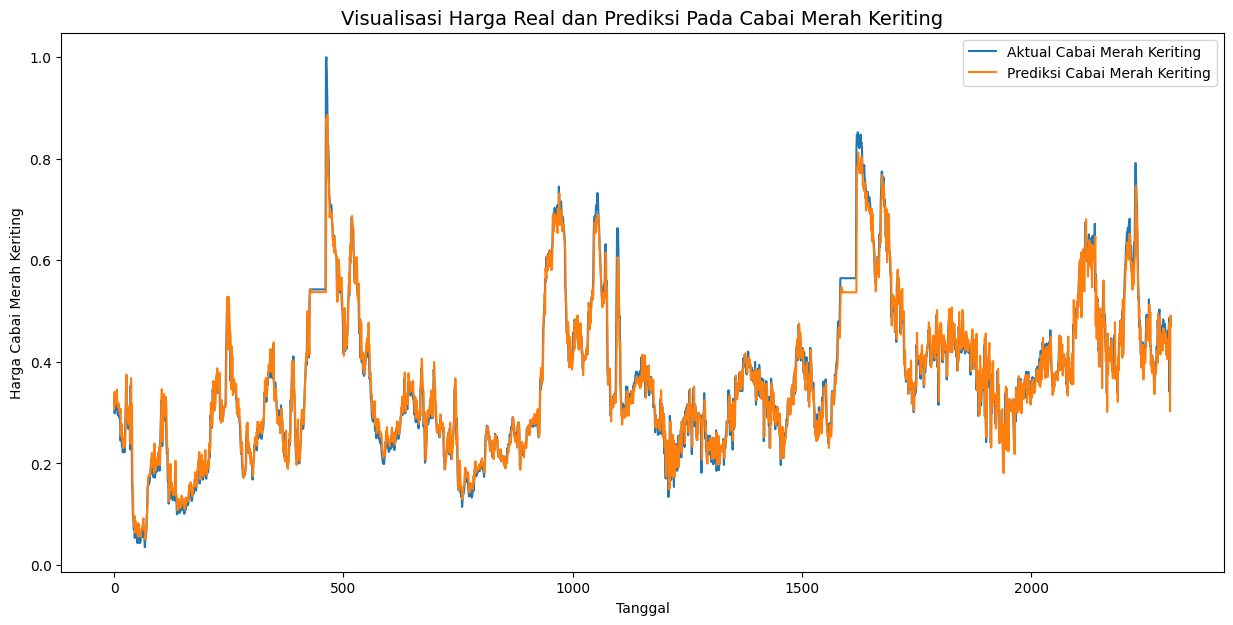

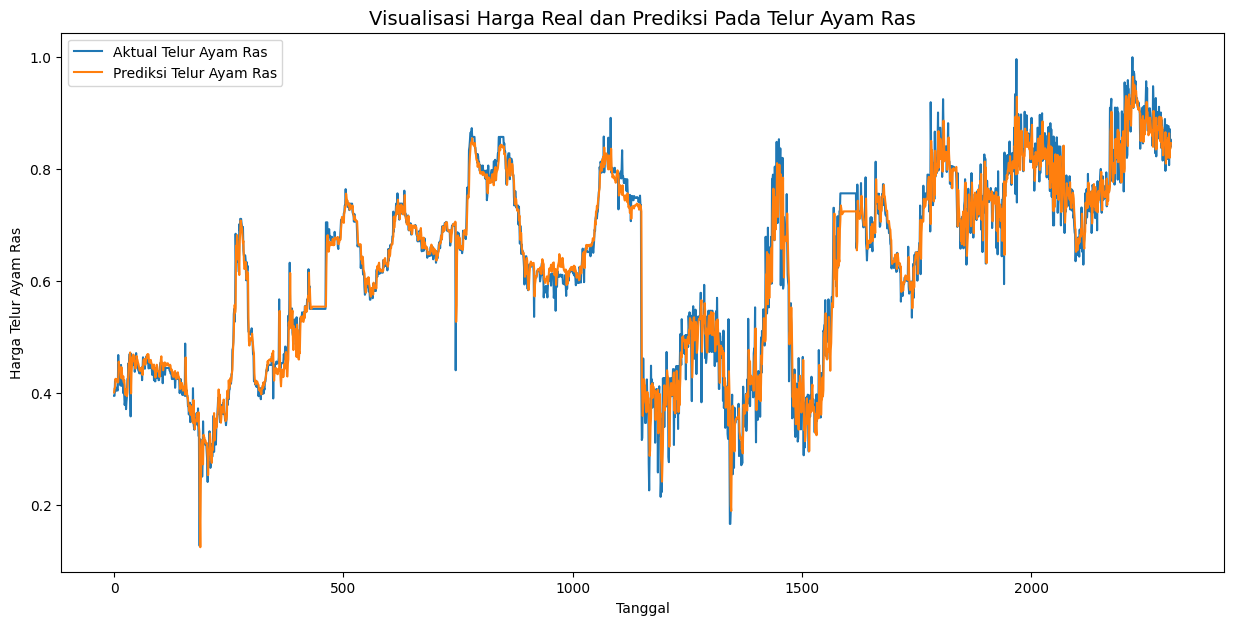

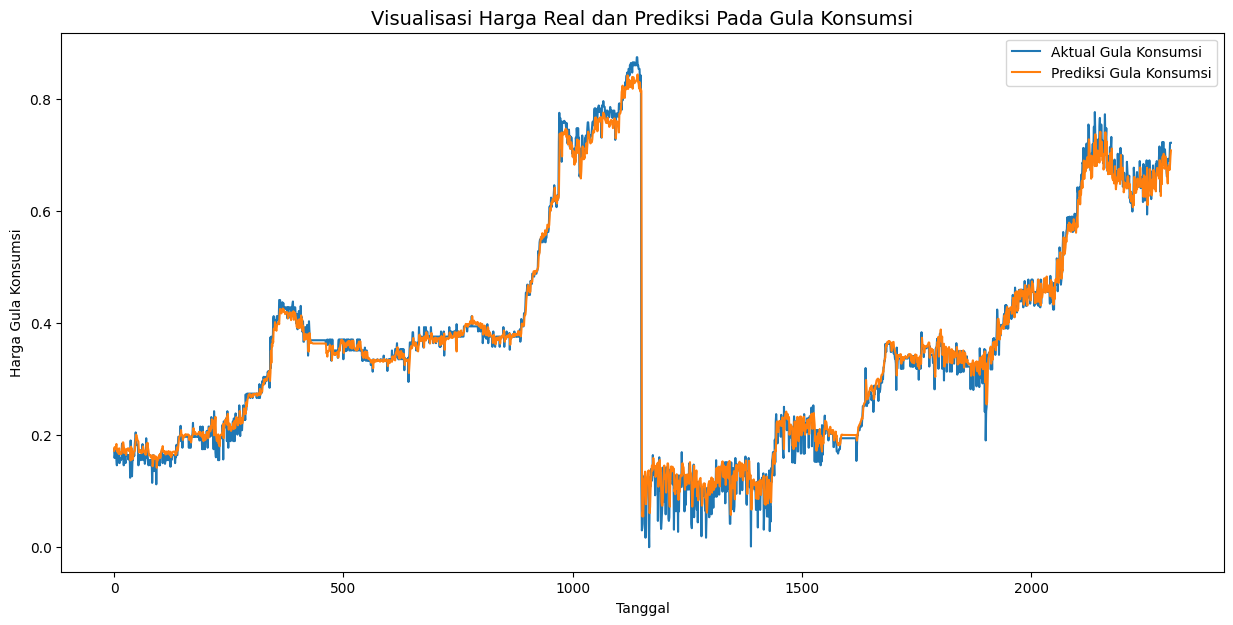

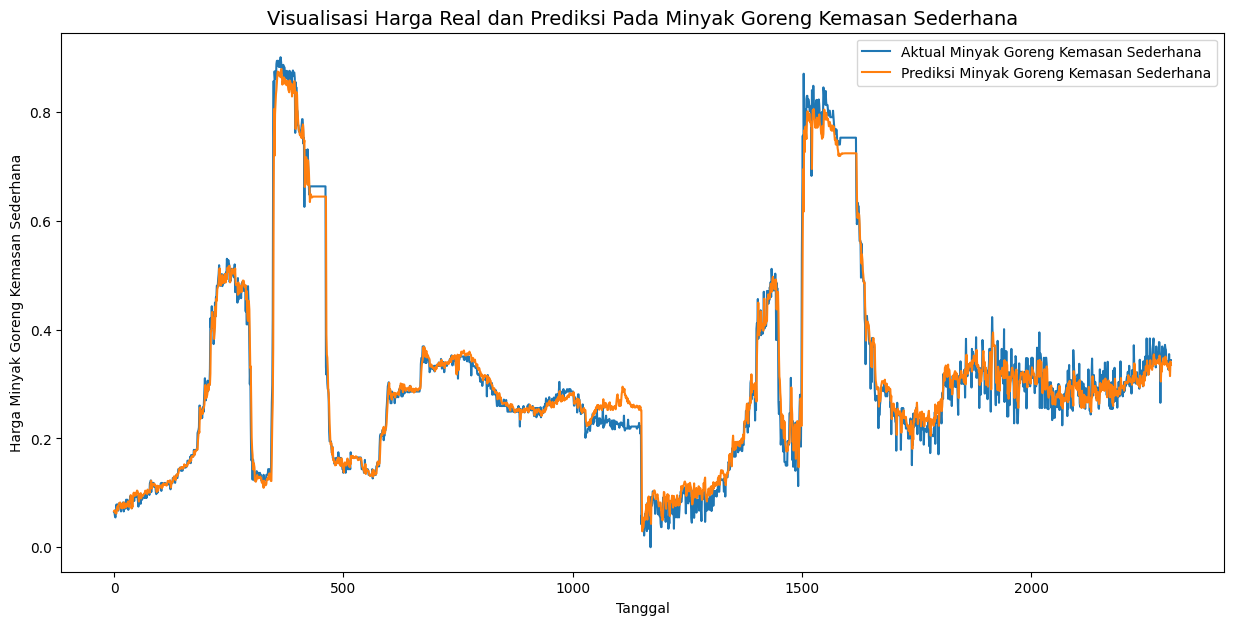

In [ ]:
# visualisasi data test (aktual) dan data hasil prediksi

plot_predict = model.predict(X_test)

# Plot Loss
for i, target in enumerate(targets):
    plt.figure(figsize=(15,7))
    plt.plot(y_test[:, i], label=f'Aktual {targets[i].replace("_", " ").title()}')
    plt.plot(plot_predict[:, i], label=f'Prediksi {targets[i].replace("_", " ").title()}')
    plt.title(f'Visualisasi Harga Real dan Prediksi Pada {targets[i].replace("_", " ").title()}', fontsize=14)

    plt.xlabel('Tanggal')
    plt.ylabel(f'Harga {targets[i].replace("_", " ").title()}')
    plt.legend()
    plt.show()

289/289 [==============================] - 1s 3ms/step


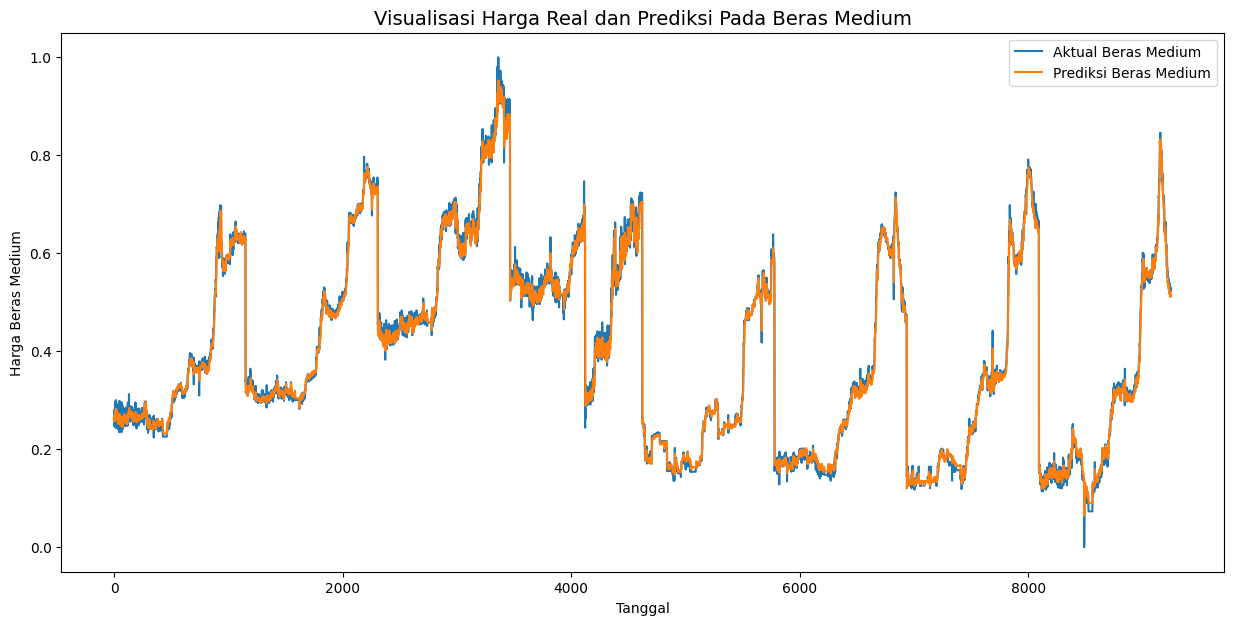

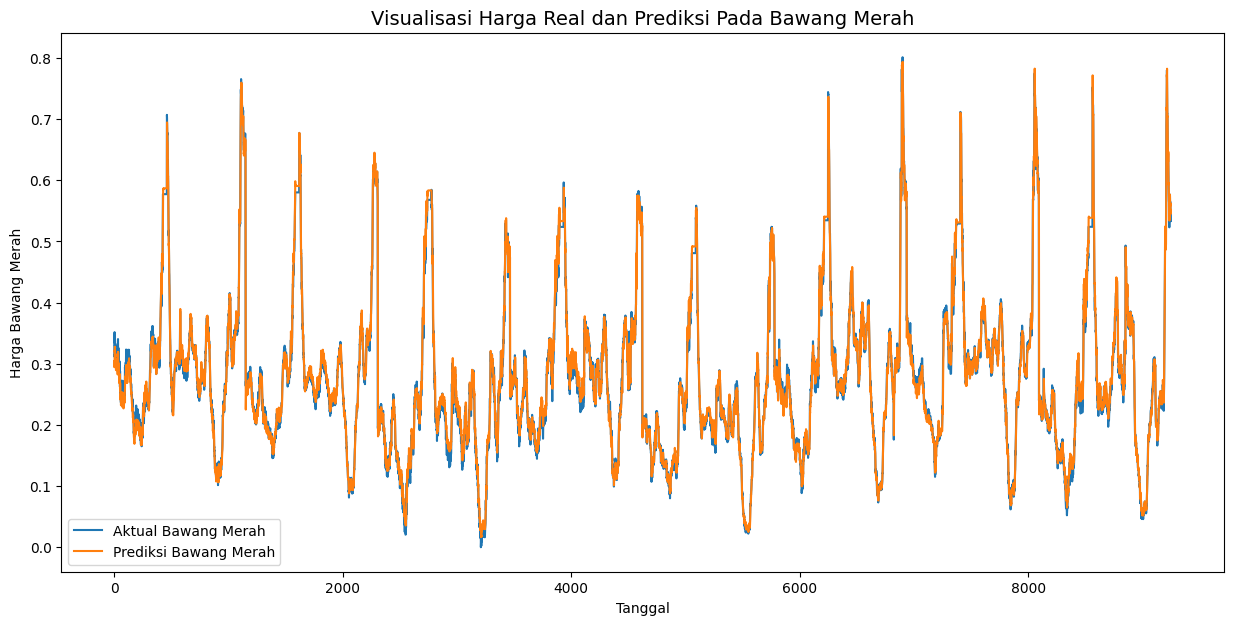

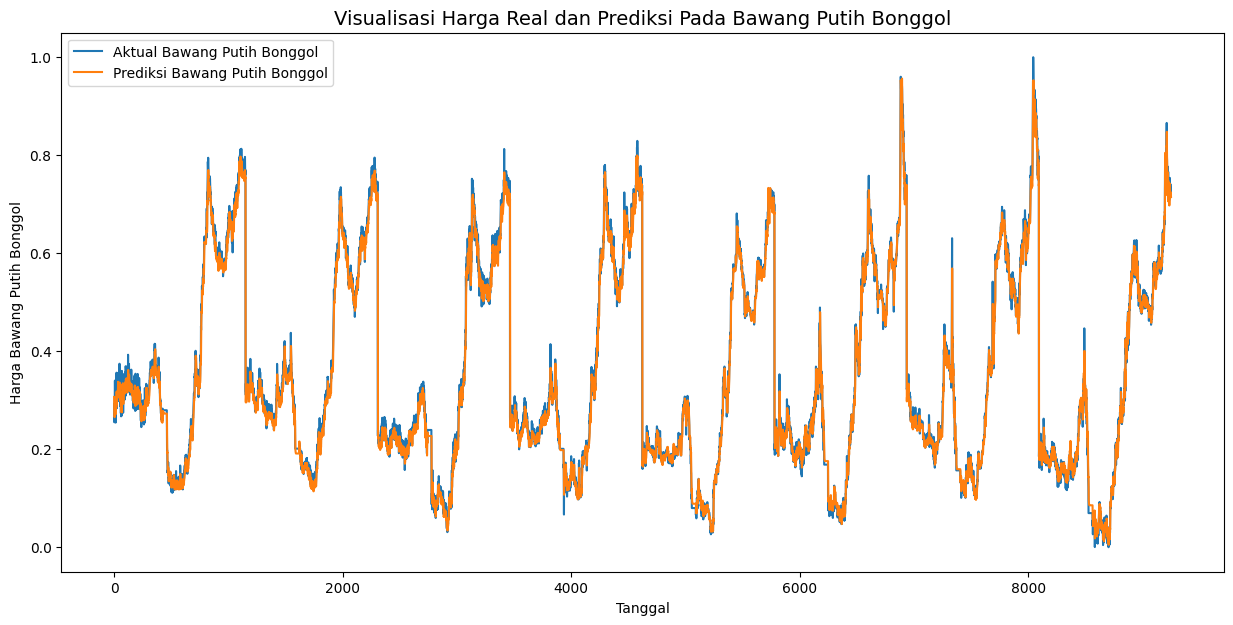

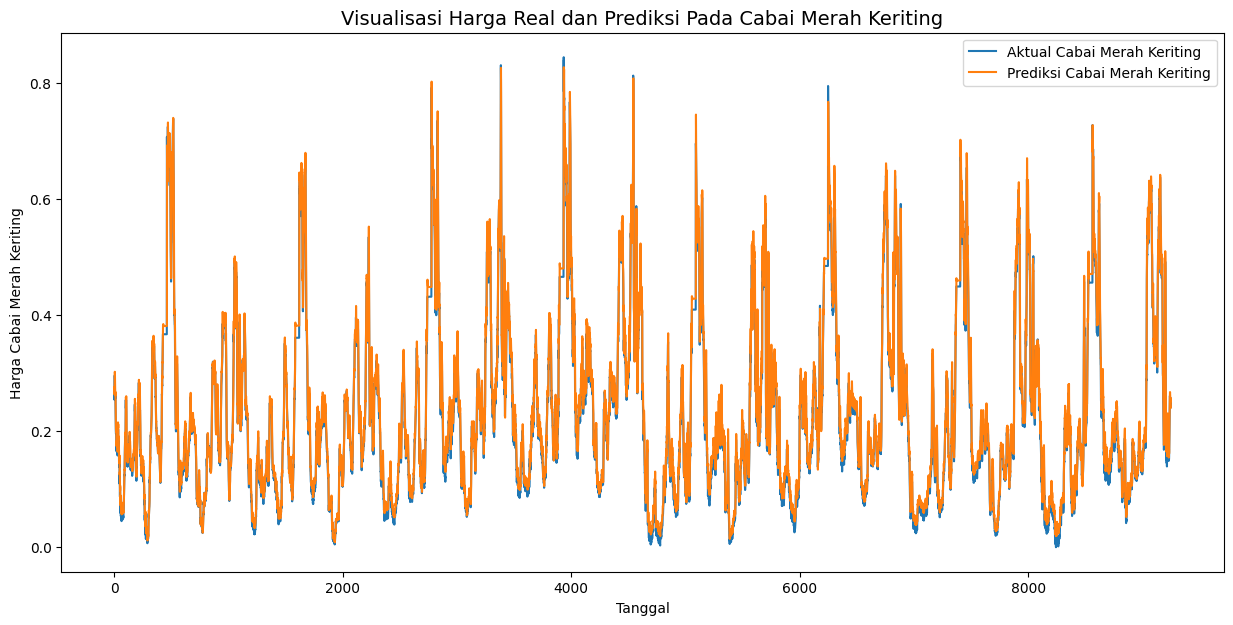

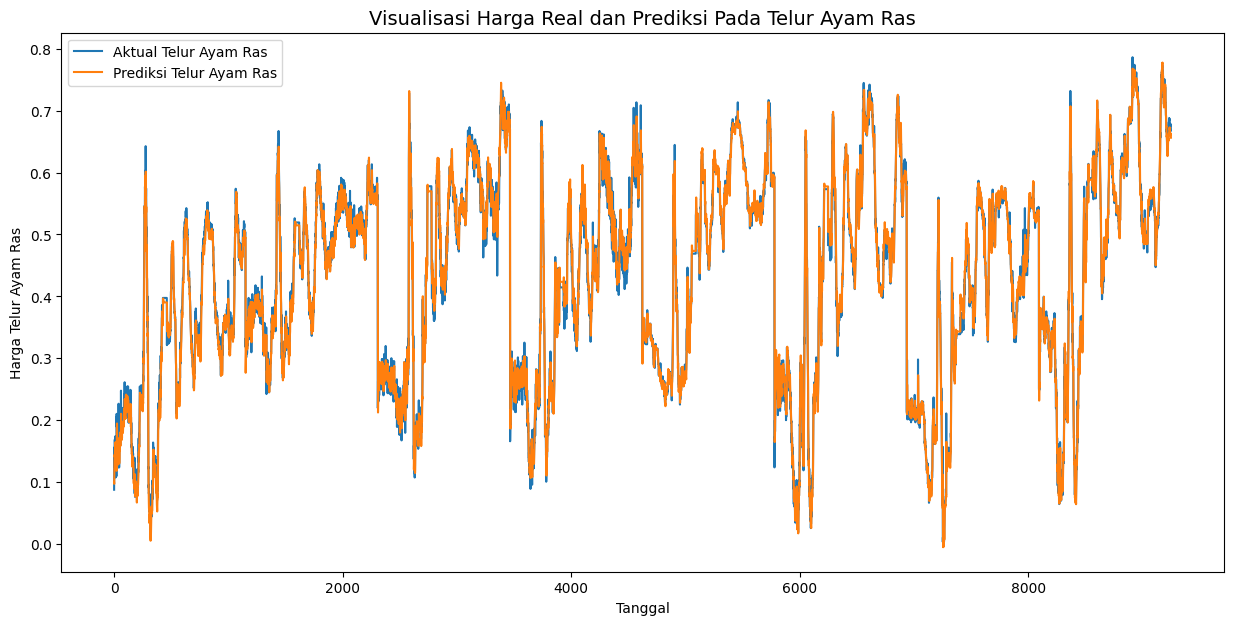

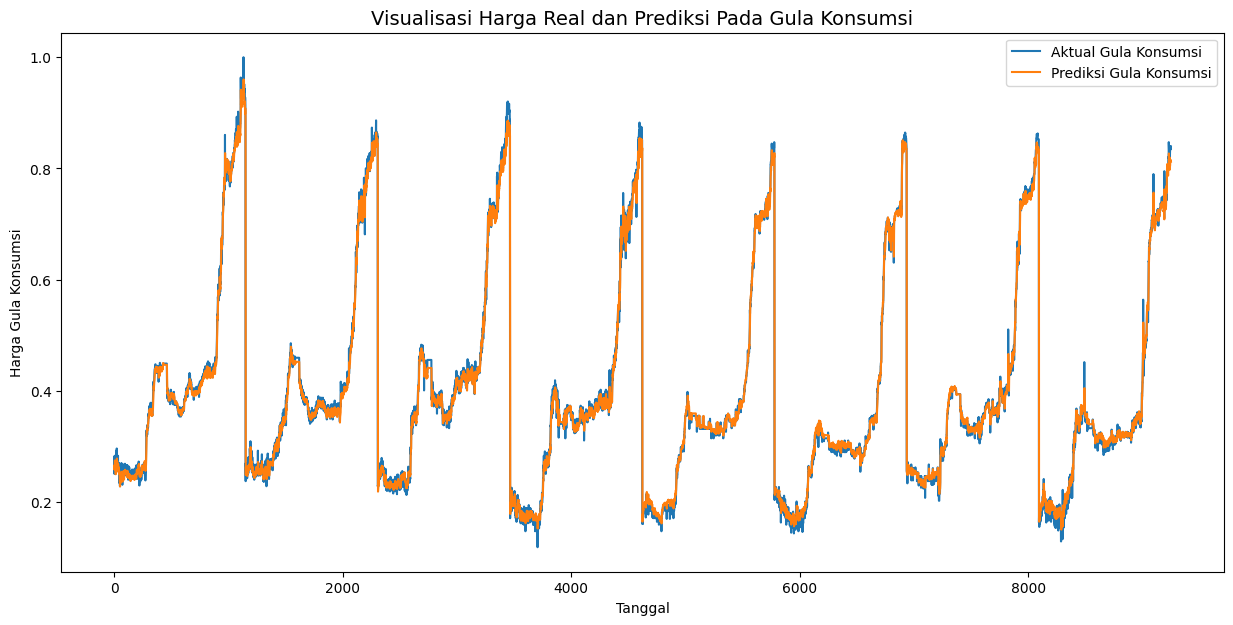

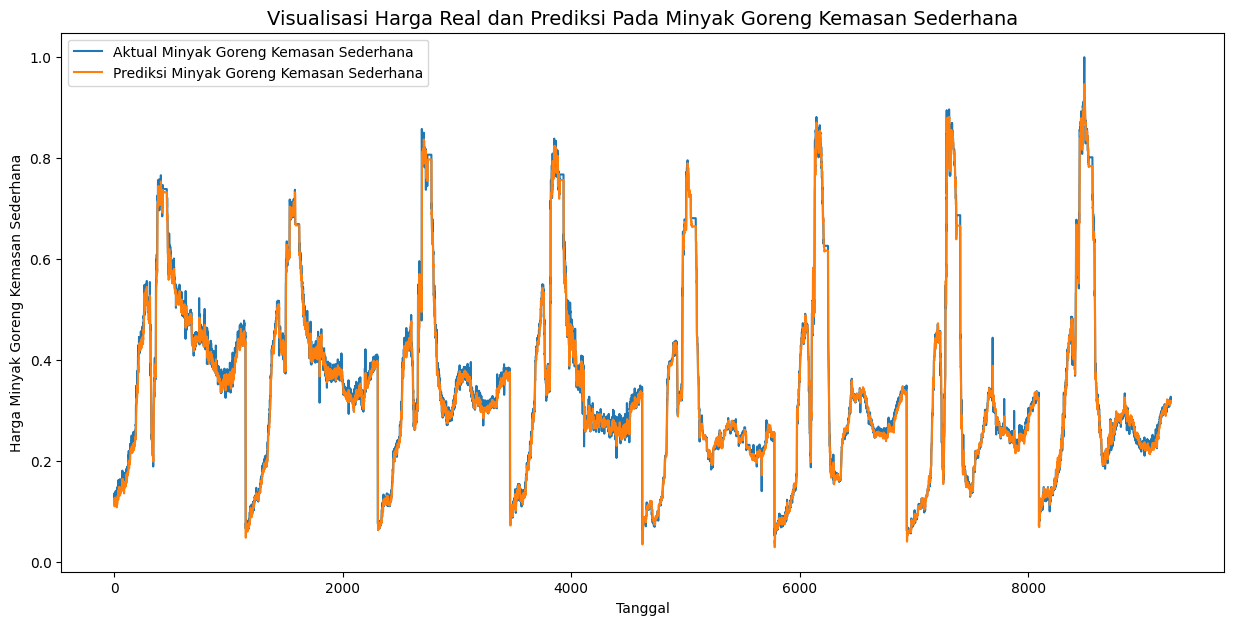

In [ ]:
# Visualisasi data train (aktual) dan data hasil prediksi

plot_predict = model.predict(X_train)

# Plot Loss
for i, target in enumerate(targets):
    plt.figure(figsize=(15,7))
    plt.plot(y_train[:, i], label=f'Aktual {targets[i].replace("_", " ").title()}')
    # plt.plot(y_test, label = 'Data Aktual')
    plt.plot(plot_predict[:, i], label=f'Prediksi {targets[i].replace("_", " ").title()}')
    # plt.plot(plot_predict, label = 'Data Prediksi')
    plt.title(f'Visualisasi Harga Real dan Prediksi Pada {targets[i].replace("_", " ").title()}', fontsize=14)

    plt.xlabel('Tanggal')
    plt.ylabel(f'Harga {targets[i].replace("_", " ").title()}')
    plt.legend()
    plt.show()

## **Model Evaluasi**

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from numpy import sqrt

train_predict = model.predict(X_train,verbose=0)
test_predict = model.predict(X_test,verbose=0)

# # hitung MAE
mae = mean_absolute_error(y_test, test_predict)
print('MAE = ', round(mae,4))

# hitung RMSE
rmse = sqrt(mean_squared_error(y_test, test_predict))
print('RMSE = ', round(rmse,4))

MAE =  0.0213
RMSE =  0.0324


## **Model Prediksi**

In [ ]:
future_day = 30
last_date = df['tanggal'].iloc[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_day, freq='D')
provinsi_unik = df['kode_provinsi'].unique()

# prediksi untuk setiap provinsi
forecast_dfs = []
for provinsi in provinsi_unik:
    group = df[df['kode_provinsi'] == provinsi]
    X_test_prov = prepare_data(group, time_steps)[0]
    future_input = X_test_prov[-future_day:]

    future_predictions = model.predict(future_input)
    future_predictions = scaler.inverse_transform(future_predictions)

    future_df = pd.DataFrame({
        'tanggal': future_dates
    })

    for i, target_col in enumerate(targets):
        future_df[target_col] = future_predictions[:, i]

    future_df['kode_provinsi'] = provinsi

    forecast_dfs.append(future_df)

# # hasil prediksi untuk setiap provinsi
# for i, provinsi in enumerate(provinsi_unik):
#     print(f"Prediksi untuk Provinsi {provinsi}:")
#     print(forecast_dfs[i].head())

1/1 [==============================] - 0s 19ms/step


In [ ]:
# @title Save File Harga Prediksi

forecast_df = pd.concat(forecast_dfs, ignore_index=True)
forecast_df.set_index('tanggal', inplace=True)
forecast_df.to_csv('hasil_prediksiLSTM16.csv')

In [ ]:
forecast_df

beras_medium  bawang_merah  bawang_putih_bonggol  \
tanggal                                                        
2024-06-01  13163.440430  58359.234375          41312.761719   
2024-06-02  13176.944336  57980.488281          41316.816406   
2024-06-03  13181.607422  57664.425781          41157.781250   
2024-06-04  13215.228516  56781.558594          40815.539062   
2024-06-05  13180.256836  57396.152344          41018.746094   
...                  ...           ...                   ...   
2024-06-26  13852.832031  39375.988281          37922.000000   
2024-06-27  13826.895508  39790.156250          37787.765625   
2024-06-28  13843.469727  39736.484375          37601.257812   
2024-06-29  13922.367188  39727.339844          38135.656250   
2024-06-30  13897.158203  40447.003906          38412.207031   

            cabai_merah_keriting  telur_ayam_ras  gula_konsumsi  \
tanggal                                                           
2024-06-01          47380.171875    26171.654297   18546.656250   
2024-06-02          50519.964844    26269.707031   18580.419922   
2024-06-03          51043.125000    26405.359375   18675.267578   
2024-06-04          51907.722656    26458.183594   18669.556641   
2024-06-05          51894.250000    26469.564453   18683.326172   
...                          ...             ...            ...   
2024-06-26          66109.140625    32215.304688   16760.144531   
2024-06-27          70141.640625    31568.076172   16698.158203   
2024-06-28          50722.972656    31813.158203   16764.578125   
2024-06-29          71569.281250    31816.322266   16889.755859   
2024-06-30          69327.320312    31957.324219   16965.099609   

            minyak_goreng_kemasan_sederhana  kode_provinsi  
tanggal                                                     
2024-06-01                     18398.386719              1  
2024-06-02                     18421.121094              1  
2024-06-03                     18550.515625              1  
2024-06-04                     18465.623047              1  
2024-06-05                     18384.638672              1  
...                                     ...            ...  
2024-06-26                     16887.935547             10  
2024-06-27                     16950.599609             10  
2024-06-28                     16733.925781             10  
2024-06-29                     17096.130859             10  
2024-06-30                     17011.318359             10  

[300 rows x 8 columns]

## **Perbandingan Harga Real pada Dataset Sumatera dengan Harga Prediksi**

In [ ]:
# import matplotlib.pyplot as plt

# provinsi_unik = df['kode_provinsi'].unique()

# for provinsi in provinsi_unik:
#     for i, bahan in enumerate(targets):
#         forecast_df = [df for df in forecast_dfs if df['kode_provinsi'].unique()[0] == provinsi][0]
#         forecast_df['tanggal'] = pd.to_datetime(forecast_df['tanggal'])

#         # dataset asli
#         real_df = pd.read_csv('sumatera.csv')
#         real_df['tanggal'] = pd.to_datetime(real_df['tanggal'], format='%d/%m/%Y')
#         real_df = real_df[real_df['kode_provinsi'] == provinsi]

#         # gabungkan data real dan prediksi
#         combined_df = pd.concat([real_df, forecast_df], ignore_index=True)
#         combined_df = combined_df.sort_values('tanggal')

#         # visualisasi data real dan prediksi
#         plt.figure(figsize=(12, 6))
#         plt.plot(combined_df[combined_df['tanggal'] < forecast_df['tanggal'].min()]['tanggal'], combined_df[combined_df['tanggal'] < forecast_df['tanggal'].min()][bahan], label='Actual', color='b')
#         plt.plot(combined_df[combined_df['tanggal'] >= forecast_df['tanggal'].min()]['tanggal'], combined_df[combined_df['tanggal'] >= forecast_df['tanggal'].min()][bahan], label='Future Predict', color='orange')
#         plt.title(f'Prediksi Harga {bahan.replace("_", " ").title()} untuk Provinsi {provinsi} Untuk Periode Ke Depan', fontsize=13)
#         plt.ylabel('Harga')
#         plt.xlabel('Tanggal')
#         plt.legend(loc='best')
#         plt.show()

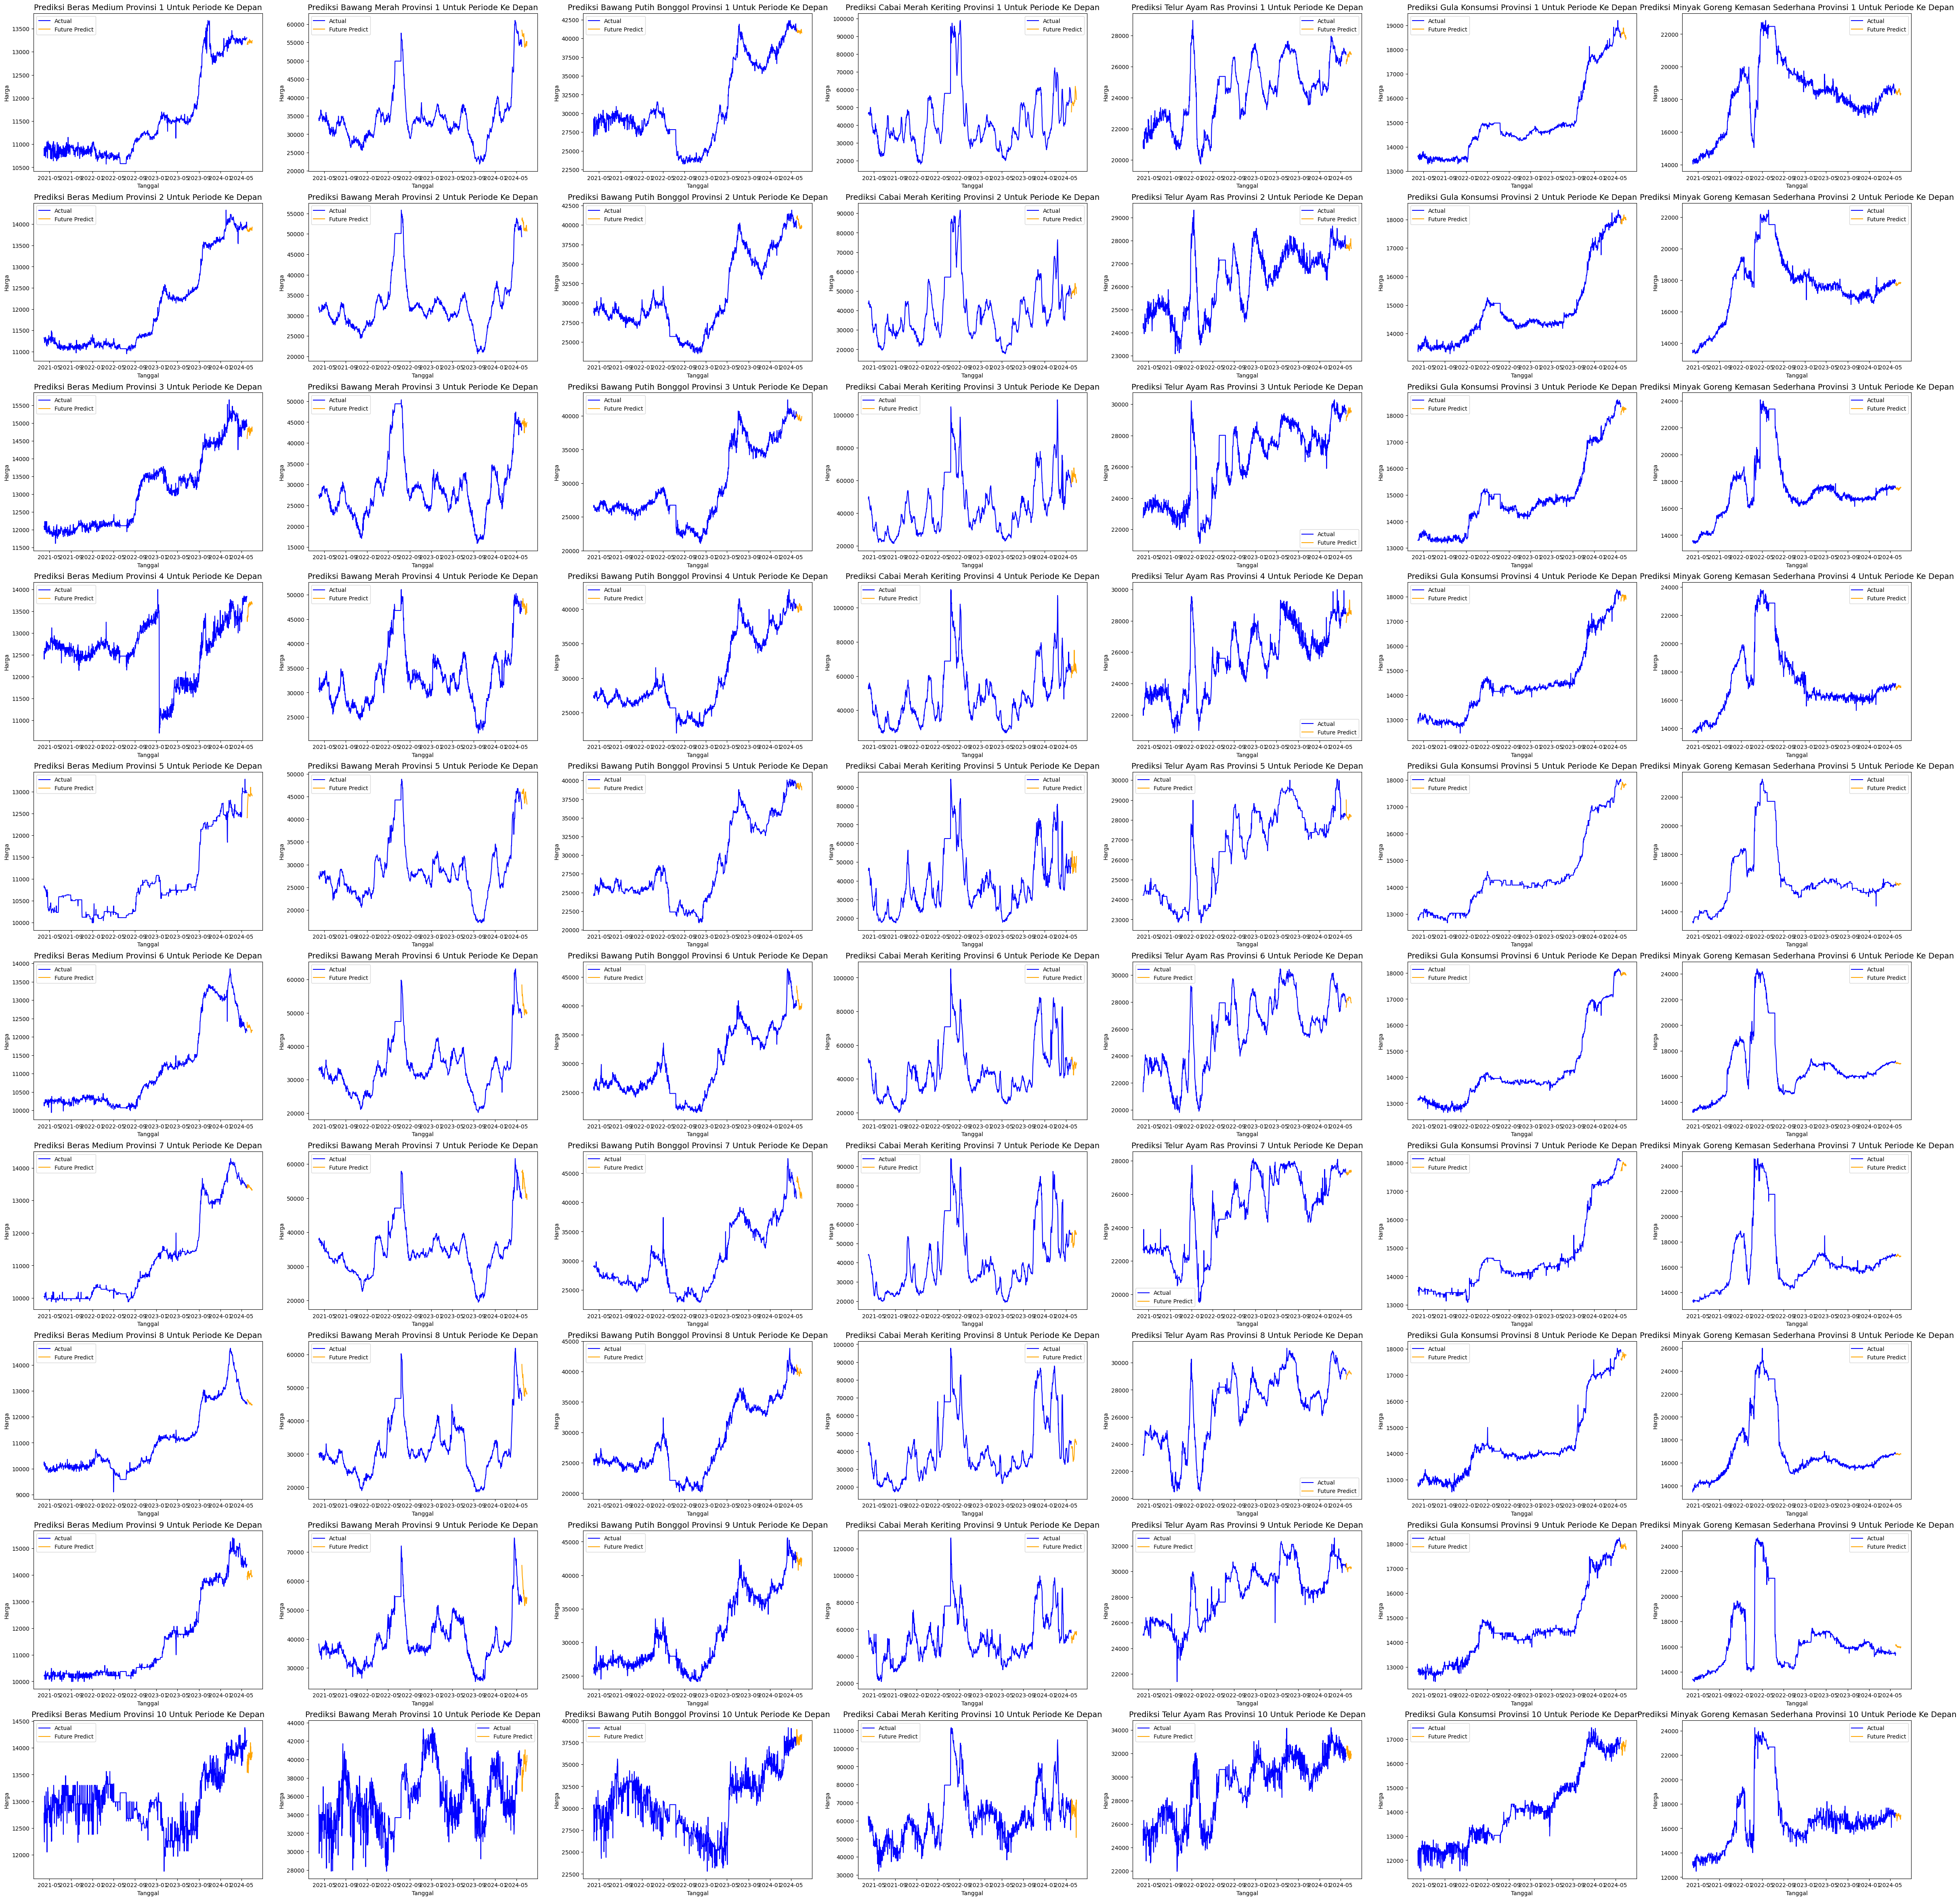

In [ ]:
import matplotlib.pyplot as plt

provinsi_unik = df['kode_provinsi'].unique()

fig, axs = plt.subplots(nrows=len(provinsi_unik), ncols=len(targets), figsize=(60, 60))

for i, provinsi in enumerate(provinsi_unik):
    forecast_df = [df for df in forecast_dfs if df['kode_provinsi'].unique()[0] == provinsi][0]
    forecast_df['tanggal'] = pd.to_datetime(forecast_df['tanggal'])

    # dataset asli
    real_df = pd.read_csv('sumatera.csv')
    real_df['tanggal'] = pd.to_datetime(real_df['tanggal'], format='%d/%m/%Y')
    real_df = real_df[real_df['kode_provinsi'] == provinsi]

    # gabungkan data real dan prediksi
    combined_df = pd.concat([real_df, forecast_df], ignore_index=True)
    combined_df = combined_df.sort_values('tanggal')

    for j, bahan in enumerate(targets):
        axs[i, j].plot(combined_df[combined_df['tanggal'] < forecast_df['tanggal'].min()]['tanggal'], combined_df[combined_df['tanggal'] < forecast_df['tanggal'].min()][bahan], label='Actual', color='b')
        axs[i, j].plot(combined_df[combined_df['tanggal'] >= forecast_df['tanggal'].min()]['tanggal'], combined_df[combined_df['tanggal'] >= forecast_df['tanggal'].min()][bahan], label='Future Predict', color='orange')
        axs[i, j].set_title(f'Prediksi {bahan.replace("_", " ").title()} Provinsi {provinsi} Untuk Periode Ke Depan', fontsize=14)
        axs[i, j].set_xlabel('Tanggal')
        axs[i, j].set_ylabel('Harga')
        axs[i, j].legend(loc='best')
plt.show()

## **Perbandingan Harga Real dengan Harga Prediksi (Sekarang)**

In [ ]:
# import matplotlib.pyplot as plt

# provinsi_unik = df['kode_provinsi'].unique()

# for provinsi in provinsi_unik:
#     for i, bahan in enumerate(targets):
#         forecast_df = [df for df in forecast_dfs if df['kode_provinsi'].unique()[0] == provinsi][0]
#         # forecast_df = df[df['kode_provinsi'] == provinsi]
#         forecast_df['tanggal'] = pd.to_datetime(forecast_df['tanggal'])

#         # dataset asli
#         real_df = pd.read_csv('hargaa_sekarang.csv')
#         real_df = real_df.drop(['provinsi'], axis=1)
#         real_df['tanggal'] = pd.to_datetime(real_df['tanggal'], format='%d/%m/%Y')
#         real_df = real_df[real_df['kode_provinsi'] == provinsi]

#         real_df['is_real'] = True
#         forecast_df['is_real'] = False

#         real_predik = pd.concat([real_df, forecast_df], ignore_index=True)
#         real_predik = real_predik.sort_values('tanggal')

#         # visualisasi data real dan prediksi
#         plt.figure(figsize=(12, 6))
#         plt.plot(real_predik[real_predik['is_real']]['tanggal'], real_predik[real_predik['is_real']][bahan], label='Real', color='b')
#         plt.plot(real_predik[~real_predik['is_real']]['tanggal'], real_predik[~real_predik['is_real']][bahan], label='Prediksi', color='orange')
#         plt.title(f'Perbandingan Harga {bahan.replace("_", " ").title()} untuk Provinsi {provinsi}', fontsize=13)
#         plt.ylabel('Harga')
#         plt.xlabel('Tanggal')
#         plt.legend(loc='best')
#         plt.show()

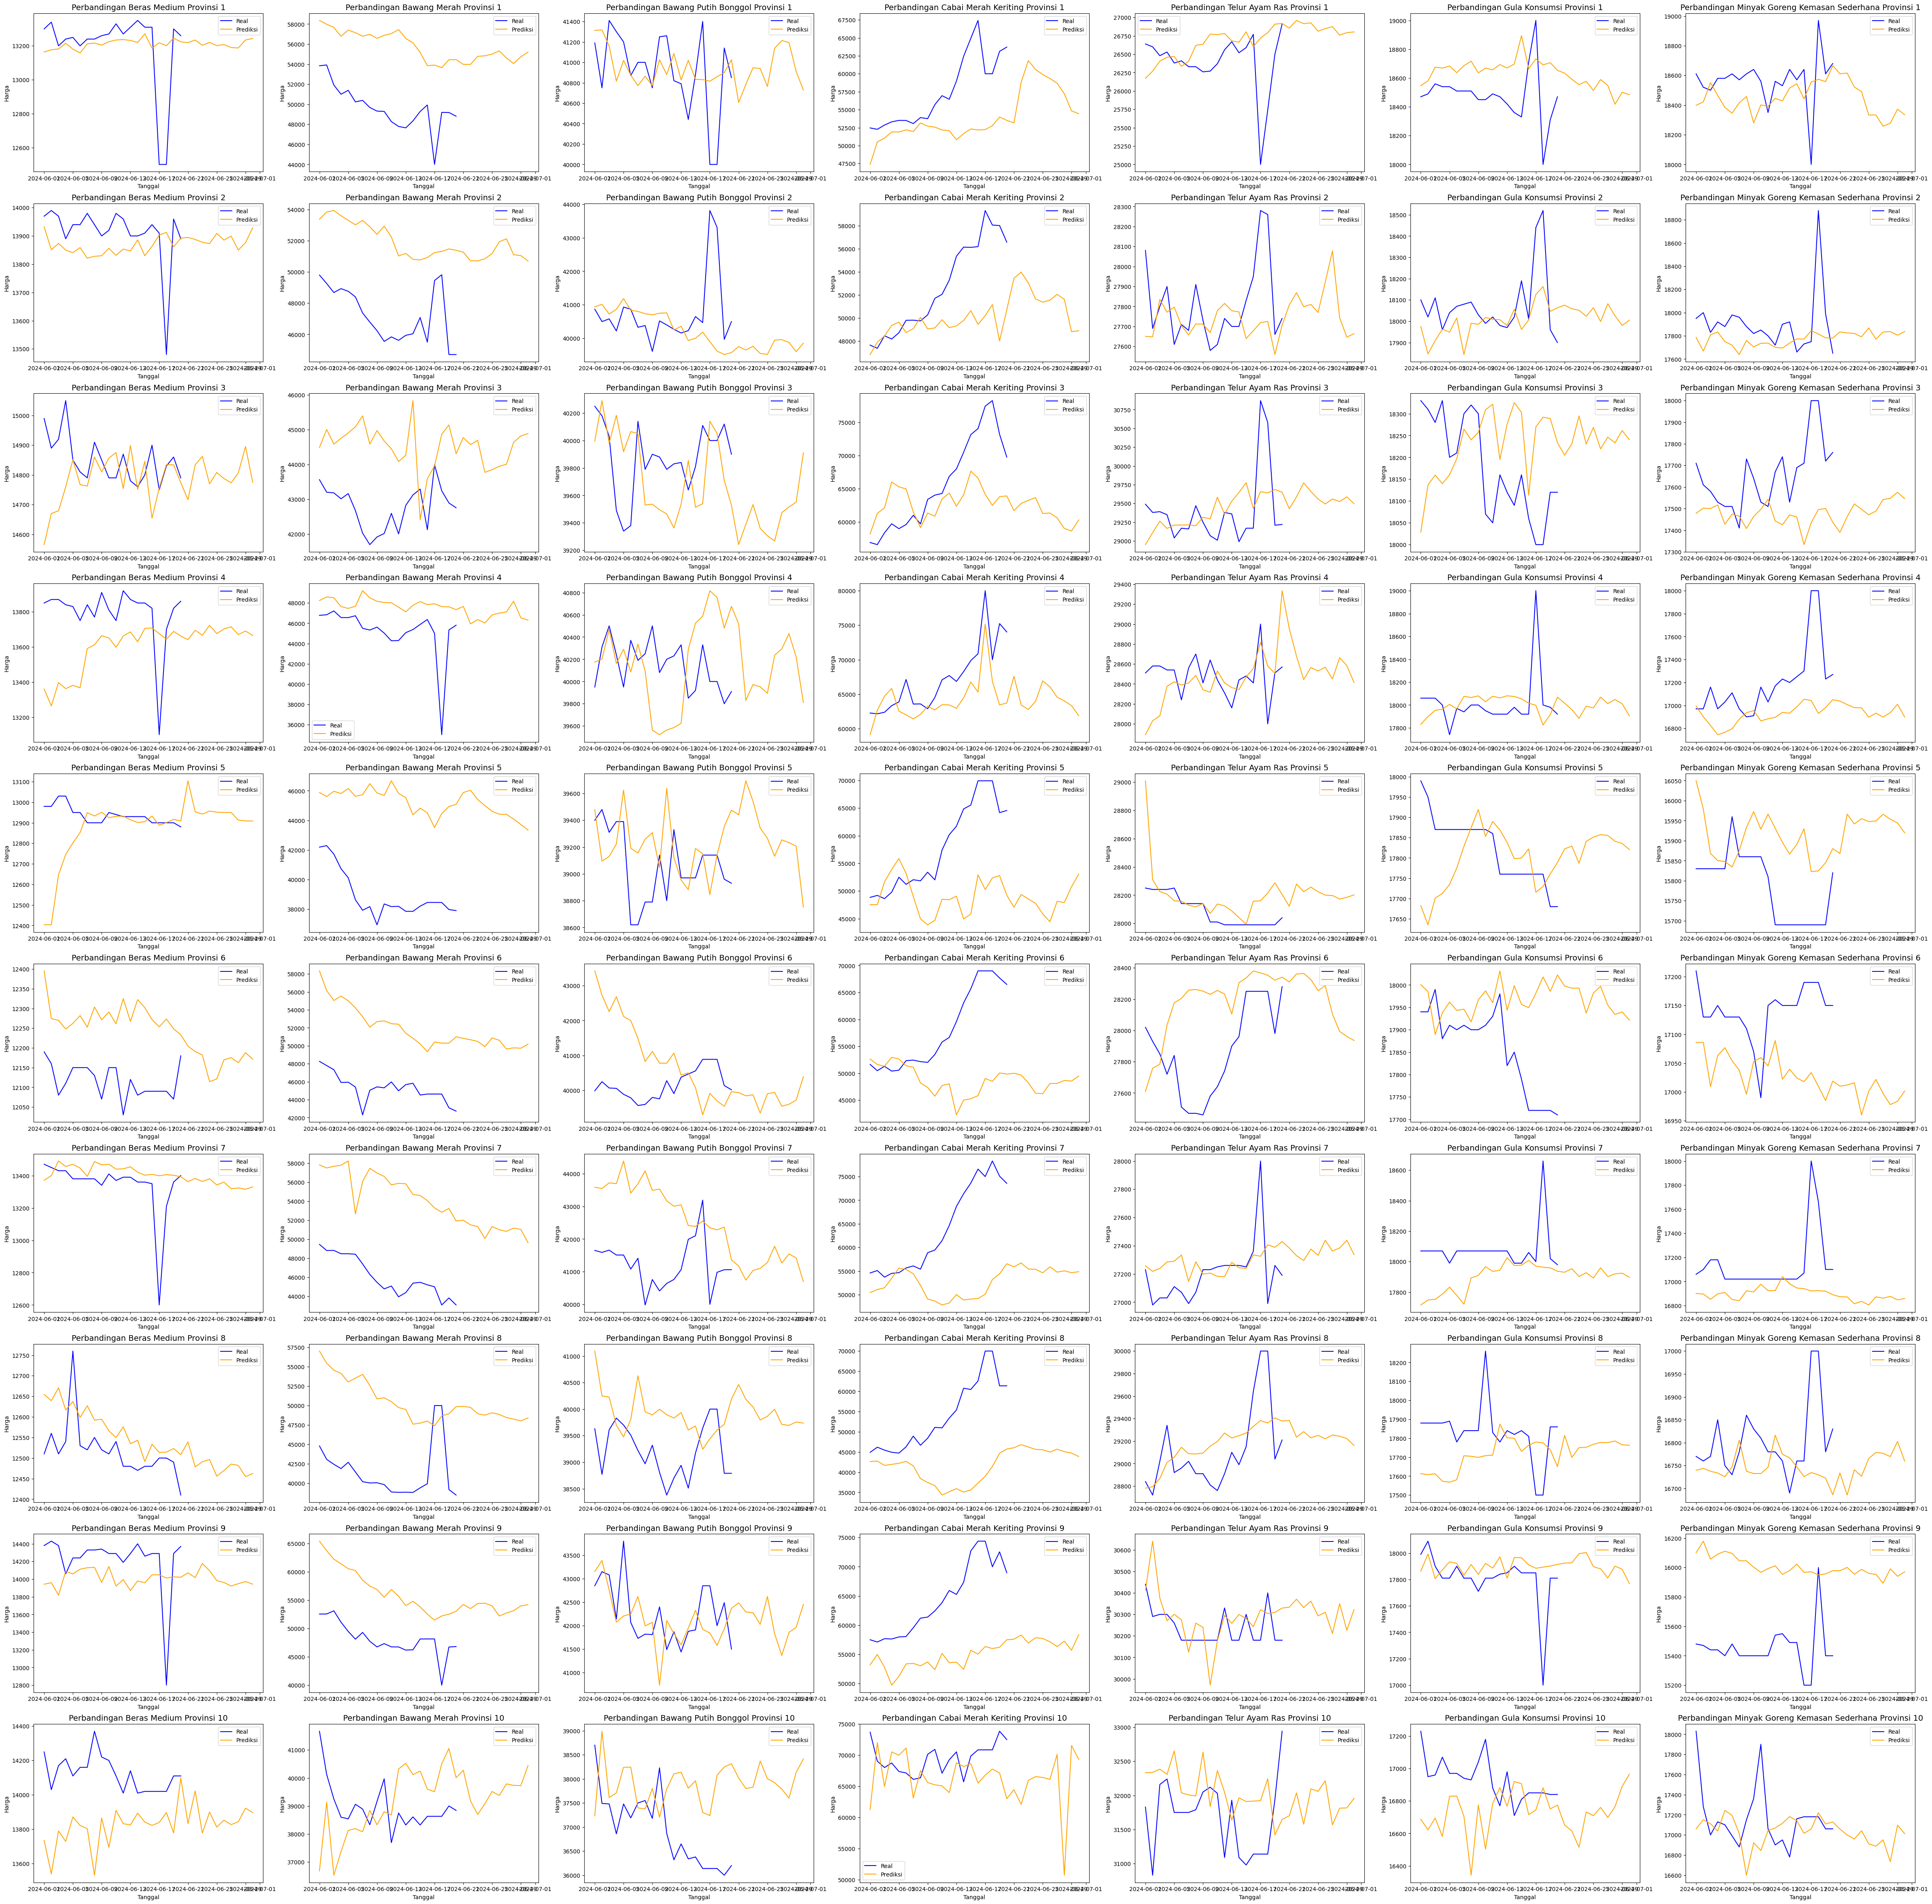

In [ ]:
import matplotlib.pyplot as plt

kode_provinsi = df['kode_provinsi'].unique()

fig, axs = plt.subplots(nrows=len(kode_provinsi), ncols=len(targets), figsize=(60, 60))

real_predik_gabung = []

for i, provinsi in enumerate(kode_provinsi):
    forecast_df = [df for df in forecast_dfs if df['kode_provinsi'].unique()[0] == provinsi][0]
    # forecast_df = df[df['kode_provinsi'] == provinsi]
    forecast_df['tanggal'] = pd.to_datetime(forecast_df['tanggal'])

    # dataset asli
    real_df = pd.read_csv('hargaa_sekarang.csv')
    real_df = real_df.drop(['provinsi'], axis=1)
    real_df['tanggal'] = pd.to_datetime(real_df['tanggal'], format='%d/%m/%Y')
    real_df = real_df[real_df['kode_provinsi'] == provinsi]

    real_df['is_real'] = True
    forecast_df['is_real'] = False

    real_predik = pd.concat([real_df, forecast_df], ignore_index=True)
    real_predik = real_predik.sort_values('tanggal')

    real_predik_gabung.append(real_predik)

    for j, bahan in enumerate(targets):
        axs[i, j].plot(real_predik[real_predik['is_real']]['tanggal'], real_predik[real_predik['is_real']][bahan], label='Real', color='b')
        axs[i, j].plot(real_predik[~real_predik['is_real']]['tanggal'], real_predik[~real_predik['is_real']][bahan], label='Prediksi', color='orange')
        axs[i, j].set_title(f'Perbandingan {bahan.replace("_", " ").title()} Provinsi {provinsi}', fontsize=14)
        axs[i, j].set_xlabel('Tanggal')
        axs[i, j].set_ylabel('Harga')
        axs[i, j].legend(loc='best')
plt.show()

In [ ]:
data_real_predik = pd.concat(real_predik_gabung, ignore_index=True)
data_real_predik.head(40)

tanggal  kode_provinsi  beras_medium  bawang_merah  \
0  2024-06-01              1  13300.000000  53840.000000   
1  2024-06-01              1  13163.440430  58359.234375   
2  2024-06-02              1  13340.000000  53920.000000   
3  2024-06-02              1  13176.944336  57980.488281   
4  2024-06-03              1  13200.000000  51920.000000   
5  2024-06-03              1  13181.607422  57664.425781   
6  2024-06-04              1  13240.000000  51000.000000   
7  2024-06-04              1  13215.228516  56781.558594   
8  2024-06-05              1  13180.256836  57396.152344   
9  2024-06-05              1  13250.000000  51390.000000   
10 2024-06-06              1  13157.964844  57136.253906   
11 2024-06-06              1  13200.000000  50240.000000   
12 2024-06-07              1  13211.844727  56787.750000   
13 2024-06-07              1  13240.000000  50390.000000   
14 2024-06-08              1  13216.465820  56974.375000   
15 2024-06-08              1  13240.000000  49680.000000   
16 2024-06-09              1  13260.000000  49320.000000   
17 2024-06-09              1  13204.521484  56576.265625   
18 2024-06-10              1  13270.000000  49290.000000   
19 2024-06-10              1  13224.367188  56874.457031   
20 2024-06-11              1  13234.537109  57044.101562   
21 2024-06-11              1  13330.000000  48270.000000   
22 2024-06-12              1  13270.000000  47790.000000   
23 2024-06-12              1  13237.186523  57443.933594   
24 2024-06-13              1  13232.052734  56558.621094   
25 2024-06-13              1  13310.000000  47650.000000   
26 2024-06-14              1  13219.692383  56126.054688   
27 2024-06-14              1  13350.000000  48340.000000   
28 2024-06-15              1  13271.071289  55171.886719   
29 2024-06-15              1  13310.000000  49280.000000   
30 2024-06-16              1  13310.000000  49930.000000   
31 2024-06-16              1  13187.176758  53848.144531   
32 2024-06-17              1  12500.000000  44000.000000   
33 2024-06-17              1  13218.171875  53906.589844   
34 2024-06-18              1  12500.000000  49190.000000   
35 2024-06-18              1  13200.954102  53652.230469   
36 2024-06-19              1  13245.382812  54441.285156   
37 2024-06-19              1  13300.000000  49180.000000   
38 2024-06-20              1  13223.813477  54454.710938   
39 2024-06-20              1  13260.000000  48810.000000   

    bawang_putih_bonggol  cabai_merah_keriting  telur_ayam_ras  gula_konsumsi  \
0           41190.000000          52460.000000    26640.000000   18470.000000   
1           41312.761719          47380.171875    26171.654297   18546.656250   
2           40750.000000          52270.000000    26600.000000   18490.000000   
3           41316.816406          50519.964844    26269.707031   18580.419922   
4           41410.000000          52860.000000    26480.000000   18560.000000   
5           41157.781250          51043.125000    26405.359375   18675.267578   
6           41300.000000          53310.000000    26530.000000   18540.000000   
7           40815.539062          51907.722656    26458.183594   18669.556641   
8           41018.746094          51894.250000    26469.564453   18683.326172   
9           41200.000000          53510.000000    26380.000000   18540.000000   
10          40874.253906          52189.050781    26335.292969   18637.111328   
11          40870.000000          53500.000000    26410.000000   18510.000000   
12          40771.855469          51961.640625    26403.533203   18685.636719   
13          41000.000000          53070.000000    26330.000000   18510.000000   
14          40864.035156          53157.878906    26620.408203   18717.404297   
15          41000.000000          53900.000000    26330.000000   18510.000000   
16          40750.000000          53750.000000    26260.000000   18450.000000   
17          40770.085938          52703.710938    26636.507812   18636.054688   
18    

In [ ]:
data_real_predik.to_csv('data_real_predik(model lstm16).csv', index=False)
print("Done")

Done


In [ ]:
for i, provinsi in enumerate(kode_provinsi):
    forecast_df = [df for df in forecast_dfs if df['kode_provinsi'].unique()[0] == provinsi][0]
    # forecast_df = df[df['kode_provinsi'] == provinsi]
    forecast_df['tanggal'] = pd.to_datetime(forecast_df['tanggal'])

    # dataset asli
    real_df = pd.read_csv('hargaa_sekarang.csv')
    real_df = real_df.drop(['provinsi'], axis=1)
    real_df['tanggal'] = pd.to_datetime(real_df['tanggal'], format='%d/%m/%Y')
    real_df = real_df[real_df['kode_provinsi'] == provinsi]

    real_df['is_real'] = True
    forecast_df['is_real'] = False

    real_predik = pd.concat([real_df, forecast_df], ignore_index=True)
    real_predik = real_predik.sort_values('tanggal')

    real_predik_gabung.append(real_predik)

    for bahan in targets:
        real_values = real_predik[real_predik['is_real']][bahan].values
        predicted_values = real_predik[~real_predik['is_real']][bahan].values[:20]

        mae = mean_absolute_error(real_values, predicted_values)
        # rmse = mean_squared_error(real_values, predicted_values, squared=False)
        print(f"Root Mean Squared Error (RMSE) untuk {bahan.replace('_', ' ').title()} Provinsi {provinsi}: {mae:.2f}")

Root Mean Squared Error (RMSE) untuk Beras Medium Provinsi 1: 130.78
Root Mean Squared Error (RMSE) untuk Bawang Merah Provinsi 1: 6587.43
Root Mean Squared Error (RMSE) untuk Bawang Putih Bonggol Provinsi 1: 309.48
Root Mean Squared Error (RMSE) untuk Cabai Merah Keriting Provinsi 1: 5461.03
Root Mean Squared Error (RMSE) untuk Telur Ayam Ras Provinsi 1: 335.10
Root Mean Squared Error (RMSE) untuk Gula Konsumsi Provinsi 1: 229.82
Root Mean Squared Error (RMSE) untuk Minyak Goreng Kemasan Sederhana Provinsi 1: 169.35
Root Mean Squared Error (RMSE) untuk Beras Medium Provinsi 2: 95.90
Root Mean Squared Error (RMSE) untuk Bawang Merah Provinsi 2: 5023.43
Root Mean Squared Error (RMSE) untuk Bawang Putih Bonggol Provinsi 2: 729.69
Root Mean Squared Error (RMSE) untuk Cabai Merah Keriting Provinsi 2: 3605.21
Root Mean Squared Error (RMSE) untuk Telur Ayam Ras Provinsi 2: 162.10
Root Mean Squared Error (RMSE) untuk Gula Konsumsi Provinsi 2: 114.57
Root Mean Squared Error (RMSE) untuk Minyak

<ipython-input-25-effeeeadd533>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['is_real'] = True


In [ ]:
# evaluasi data real dan prediksi secara keseluruhan

for bahan in targets:
  real_values = real_predik[real_predik['is_real']][bahan].values
  predicted_values = real_predik[~real_predik['is_real']][bahan].values[:len(real_df)]

  # mae = mean_absolute_error(real_values, predicted_values)
  rmse = mean_squared_error(real_values, predicted_values, squared=False)

  # print(f"Mean Absolute Error (MAE) untuk {bahan.replace('_', ' ').title()} (Keseluruhan): {mae:.2f}")
  print(f"Root Mean Squared Error (RMSE) untuk {bahan.replace('_', ' ').title()} (Keseluruhan): {rmse:.2f}")
  # print("\n")

Root Mean Squared Error (RMSE) untuk Beras Medium (Keseluruhan): 365.80
Root Mean Squared Error (RMSE) untuk Bawang Merah (Keseluruhan): 1787.40
Root Mean Squared Error (RMSE) untuk Bawang Putih Bonggol (Keseluruhan): 1323.60
Root Mean Squared Error (RMSE) untuk Cabai Merah Keriting (Keseluruhan): 4970.07
Root Mean Squared Error (RMSE) untuk Telur Ayam Ras (Keseluruhan): 745.64
Root Mean Squared Error (RMSE) untuk Gula Konsumsi (Keseluruhan): 303.44
Root Mean Squared Error (RMSE) untuk Minyak Goreng Kemasan Sederhana (Keseluruhan): 383.14


## **Save Model**

In [ ]:
model.save('model_sumatera_lstm16.h5')
# model = tf.keras.models.load_model('model_sumatera_lstm.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
